In [1]:
import sympy as sym

import numpy as np

import itertools

sym.init_printing()

In [2]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [3]:
import evol_dynamics

In [4]:
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter

In [5]:
matplotlib.rc('font', **font)

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
from tqdm import tqdm

In [8]:
import pandas as pd

In [9]:
s_one = (0, 0, 0)
s_two = (1, 1, 0)

In [7]:
payoff_vector = np.array(evol_dynamics.donation_game(1, 3))

In [8]:
evol_dynamics.steady_state(s_two, s_one, delta=0.999) @ payoff_vector 

**Defining variables**

In [9]:
y_1, p_1, q_1 = sym.symbols("y_1, p_1, q_1")
y_2, p_2, q_2 = sym.symbols("y_2, p_2, q_2")

In [10]:
s_one = (y_1, p_1, q_1)
s_two = (y_2, p_2, q_2)

In [11]:
s_one

In [12]:
combinations = itertools.product([s_one, s_two], repeat=2)

In [13]:
list(combinations)

**Get expression using code**

In [14]:
d = sym.symbols("delta")

In [15]:
v_zero = evol_dynamics.expected_distribution_opening_round(s_one, s_two)

In [16]:
v_zero

In [17]:
M = evol_dynamics.markov_chain_for_reactive_strategies(s_one, s_two)

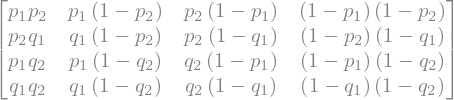

In [18]:
sym.Matrix(M)

In [19]:
inverse = sym.Matrix(np.identity(4) - d * M).inverse_ADJ()

In [20]:
expression = (1 - d) * sym.Matrix(v_zero).reshape(1, 4) @ inverse

**Check the written mathematics**

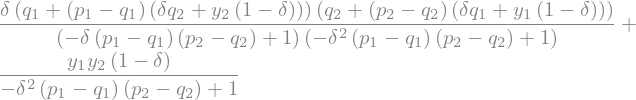

In [21]:
u_R = evol_dynamics.formulation.probability_being_in_state_R(s_one, s_two, d)
u_R

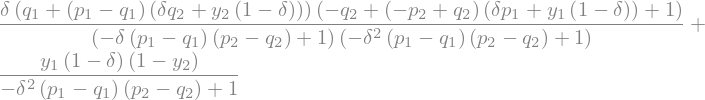

In [22]:
u_S = evol_dynamics.formulation.probability_being_in_state_S(s_one, s_two, d)
u_S

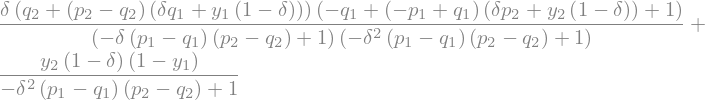

In [23]:
u_T = evol_dynamics.formulation.probability_being_in_state_T(s_one, s_two, d)
u_T

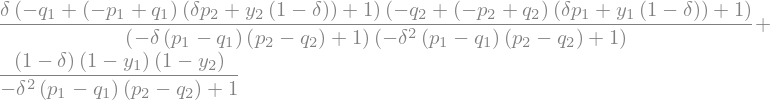

In [24]:
u_P = evol_dynamics.formulation.probability_being_in_state_P(s_one, s_two, d)
u_P

In [25]:
(u_R - expression[0]).simplify(), (u_S - expression[1]).factor()

In [26]:
(u_T - expression[2]).factor(), (u_P - expression[3]).factor()

**Check functions for analysis of ALLD into GTFT**

In [27]:
q = sym.symbols("q")

N, k = sym.symbols("N, k")

In [28]:
ALLD = (0, 0, 0)
GTFT = (1, 1, q)

**States of Eq. (9) and (10)**

In [29]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, GTFT, d).factor()

In [30]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [31]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [32]:
evol_dynamics.formulation.probability_being_in_state_T(ALLD, GTFT, d).factor()

In [33]:
(
    evol_dynamics.formulation.probability_being_in_state_S(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_T(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_P(GTFT, GTFT, d).factor(),
)

In [34]:
evol_dynamics.formulation.probability_being_in_state_R(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_S(ALLD, GTFT, d).factor()

In [35]:
evol_dynamics.formulation.probability_being_in_state_T(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_P(ALLD, GTFT, d).factor()

**Simulations** - **Example in notes**

**Plotting simulation results**

In [11]:
exp = pd.read_csv("expected.csv", header=None)

In [12]:
in_columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

In [13]:
exp.columns = in_columns

In [14]:
evol_dynamics.is_donation([1, -2, 3, 0])

True

In [15]:
evol_dynamics.donation_game(1, 3)

In [16]:
exp.head()

,y,p,q,average cooperation rate,average score,t
0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.731818,0.926496,0.044418,0.379664,0.759329,943
2,0.543796,0.972542,0.201786,0.878762,1.757525,959
3,0.020878,0.957344,0.974429,0.957139,1.914278,1008
4,0.783669,0.359829,0.054562,0.079551,0.159103,1018


In [17]:
exp = exp.drop_duplicates()

In [18]:
frequencies = []
previous = 0
for value in exp['t'][1:]:
    frequencies.append(value - previous)
    previous = value
frequencies.append(10 ** 7 - previous)

exp['frequencies'] = frequencies

In [19]:
exp.describe()

,y,p,q,average cooperation rate,average score,t,frequencies
count,49156.000000,49156.000000,49156.000000,49156.000000,49156.000000,4.915600e+04,49156.000000
mean,0.499572,0.507400,0.350510,0.440048,0.880095,4.926230e+06,203.433965
std,0.288141,0.346239,0.302052,0.317868,0.635737,2.887110e+06,815.188675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,0.249638,0.177965,0.084826,0.147362,0.294724,2.439396e+06,5.000000
50%,0.498911,0.455854,0.249415,0.397040,0.794079,4.833546e+06,23.000000
75%,0.748857,0.879631,0.596505,0.721077,1.442154,7.354762e+06,131.000000
max,0.999932,0.999996,0.999965,0.999748,1.999497,9.999933e+06,37463.000000


In [20]:
import matplotlib.colors as colors

In [21]:
cmap = matplotlib.cm.get_cmap("Blues")

In [22]:
ps, qs = [], []
for p, q, v in zip(exp["p"], exp["q"], exp["frequencies"]):
    for _ in range(int(v)):
        ps.append(p)
        qs.append(q)

In [29]:
params = {"text.color" : "blue",
          "xtick.color" : "white",
          "ytick.color" : "white"}

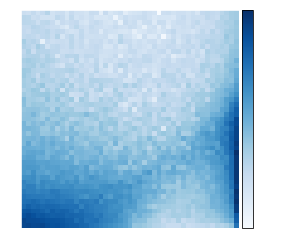

In [35]:
fig, axes = plt.subplots()

heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=45)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes.imshow(heatmap.T, extent=extent, origin="lower", cmap=cmap, norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
cb = fig.colorbar(im, cax=cax, orientation='vertical')



axes.set_xticks(np.linspace(0, 1, 2))
axes.set_yticks(np.linspace(0, 1, 2));

axes.spines['bottom'].set_color('white')
axes.spines['top'].set_color('white')
axes.spines['right'].set_color('white')
axes.spines['left'].set_color('white')


axes.xaxis.label.set_color('white')
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

plt.rcParams.update(params)

plt.savefig("/Users/glynatsi/src/talks/talks/2021-03-03-Cardiff-University/static/reactive_results.png", transparent=True, dpi=500)

In [82]:
stoch = pd.read_csv("stochastic.csv", header=None)

In [84]:
stoch.columns = in_columns

In [85]:
stoch.describe()

,y,p,q,average cooperation rate,average score,t
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,0.256059,0.257623,0.179824,0.223050,0.446100,2.596034e+06
std,0.323720,0.350463,0.278736,0.312808,0.625617,3.262581e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.027867,0.017775,0.007343,0.012046,0.024093,3.523600e+05
75%,0.510446,0.469580,0.263339,0.408343,0.816685,5.223096e+06
max,0.999991,0.999993,0.999964,0.999960,1.999921,9.999828e+06


In [86]:
stoch = stoch.drop_duplicates()

In [88]:
frequencies = []
previous = 0
for value in stoch['t'][1:]:
    frequencies.append(value - previous)
    previous = value
frequencies.append(10 ** 7 - previous)

stoch['frequencies'] = frequencies

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
ps_stoch, qs_stoch = [], []
for p, q, v in zip(stoch["p"], stoch["q"], stoch["frequencies"]):
    for _ in range(int(v)):
        ps_stoch.append(p)
        qs_stoch.append(q)

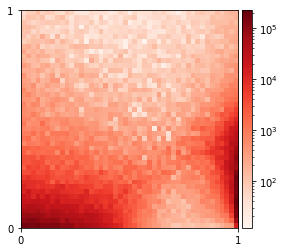

In [100]:
fig, axes = plt.subplots()

heatmap, xedges, yedges = np.histogram2d(ps_stoch, qs_stoch, bins=45)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes.imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Reds"),
                 norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

axes.set_xticks(np.linspace(0, 1, 2))
axes.set_yticks(np.linspace(0, 1, 2));

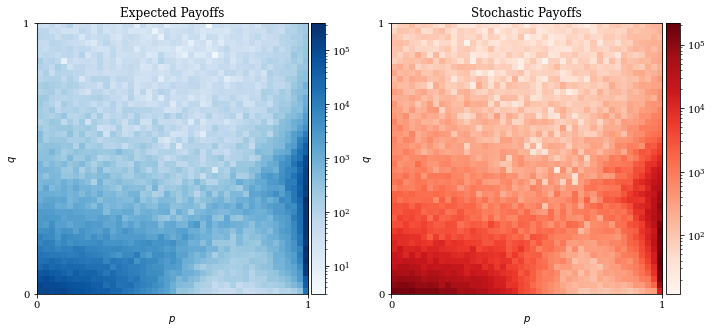

In [124]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))


heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=45)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[0].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmap, norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

divider = make_axes_locatable(axes[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')



heatmap, xedges, yedges = np.histogram2d(ps_stoch, qs_stoch, bins=45)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[1].imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Reds"),
                 norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

divider = make_axes_locatable(axes[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')


for i in range(2):
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")


axes[0].set_title("Expected Payoffs");
axes[1].set_title("Stochastic Payoffs");

fig.tight_layout()

fig.savefig("static/expected_and_stochastic_for_donation_game.pdf", )

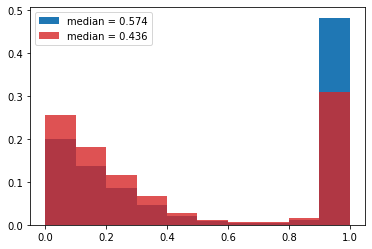

In [49]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["p"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [50]:
from scipy import stats

In [51]:
tStat, pStat = stats.ttest_ind(exp["p"], stoch["p"], equal_var=False)

In [52]:
pStat

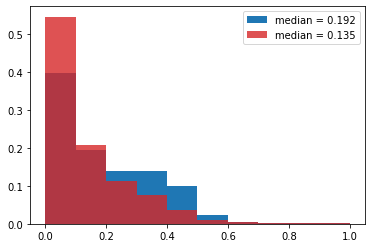

In [53]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["q"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [54]:
tStat, pStat = stats.ttest_ind(exp["q"], stoch["q"], equal_var=False)
pStat

# Distributions of cooperation

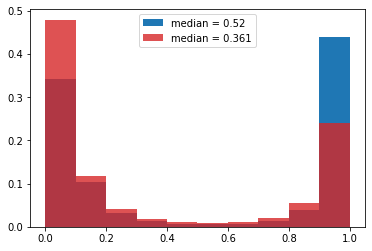

In [58]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["cooperation"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [57]:
tStat, pStat = stats.ttest_ind(exp["cooperation"], stoch["cooperation"], equal_var=False)
pStat

In [127]:
k = [(1, 0, 0), [0, 1, 1]]

In [129]:
(1, 0, 0) in k

True

In [137]:
np.array([1, 2]).shape == (2, )

True

In [139]:
isinstance(3, int)

True

In [140]:
k = np.array([1, 2])

In [145]:
isinstance(k, np.ndarray)

True

In [146]:
type(k)

numpy.ndarray